In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X=iris.data
y=iris.target
df=pd.DataFrame(X,columns=iris.feature_names)
df["Target"]=y

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


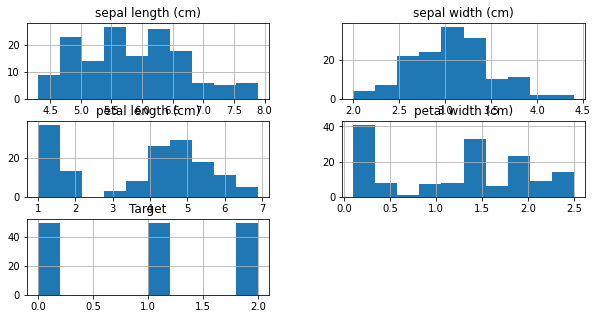

In [9]:
p=df.hist(figsize=(10,5))

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

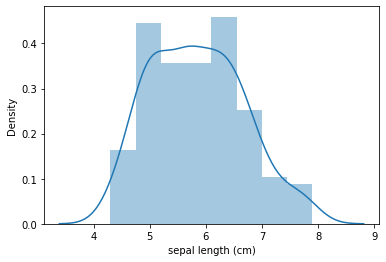

In [10]:
sns.distplot(df["sepal length (cm)"])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

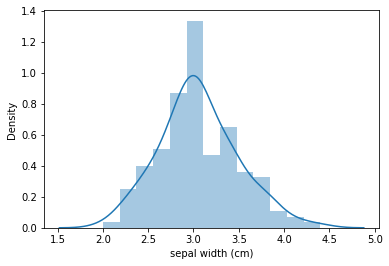

In [11]:
sns.distplot(df["sepal width (cm)"])

<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

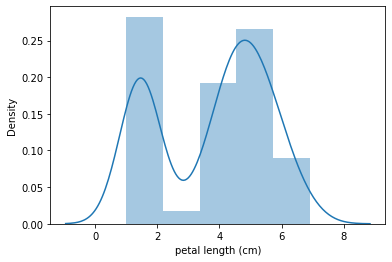

In [12]:
sns.distplot(df["petal length (cm)"])

In [13]:
df["Target"].unique()

array([0, 1, 2])

In [14]:
df["Target"].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=123)

In [17]:
X_train.shape

(120, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
y_train.shape

(120,)

In [20]:
y_test.shape

(30,)

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200)

In [32]:
y_train_pred=ada.predict(X_train)
y_test_pred=ada.predict(X_test)


In [33]:
from sklearn.metrics import classification_report

In [34]:
print ("train data")
print(classification_report(y_train,y_train_pred))

print ("test data")
print(classification_report(y_test,y_test_pred))


train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.95      0.94        44
           2       0.95      0.92      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
mb=MultinomialNB()
mb.fit(X_train,y_train)


MultinomialNB()

In [41]:
ada1=AdaBoostClassifier(base_estimator=mb,n_estimators=200,learning_rate=1)
ada1.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=MultinomialNB(), learning_rate=1,
                   n_estimators=200)

In [42]:
y_train_pred=ada1.predict(X_train)
y_test_pred=ada1.predict(X_test)


In [43]:
print ("train data")
print(classification_report(y_train,y_train_pred))

print ("test data")
print(classification_report(y_test,y_test_pred))


train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.67      1.00      0.80        44
           2       1.00      0.44      0.61        39

    accuracy                           0.82       120
   macro avg       0.89      0.81      0.80       120
weighted avg       0.88      0.82      0.80       120

test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.43      1.00      0.60         6
           2       1.00      0.27      0.43        11

    accuracy                           0.73        30
   macro avg       0.81      0.76      0.68        30
weighted avg       0.89      0.73      0.71        30

